In [42]:
from rich import inspect, print
from dataclasses import dataclass
from typing import Optional
import ipytest
ipytest.autoconfig()

In [43]:
from matplotlib import pyplot

# Workbook 6 - Designing Data


# Task A

Design a datatype to describe the shape of a rectangle. It should have the following attributes:

* `origin` - a tuple to represent an x, y coordinate
* `width`
* `height`
* `color` - Optional. A string representing one of the [matplotlib colors](matplotlib_colors.ipynb)

Create two rectangles of any size and color and assign them each to a variable.

Print your two rectangles to the notebook.

## Task A response

In [44]:
@dataclass
class Rectangle:
    origin: tuple[float, float] # x, y coordinate
    width: float
    height: float
    color: Optional[str] = None
    
rect_1 = Rectangle((10, 10), 15.3, 20, "red")
rect_2 = Rectangle((0, 0), 10, 10, 'goldenrod')

print(rect_1)
print(rect_2)

Rectangle(origin=(10, 10), width=15.3, height=20, color='red')
Rectangle(origin=(0, 0), width=10, height=10, color='goldenrod')


### Reviewer Comments

# Task B

Copy and paste your `Rectangle` data definition into the cell below.

Create two "methods" (functions) under the class definition with the following names:
1. `x`
2. `y`

Each method will only take one parameter called `self` (e.g. `def x(self):`). The parameter `self` means your data type will have access to the data contained within itself (i.e. `self.origin`, `self.width`, `self.height`, and `self.color`).

The functions should each return a list of numbers representing, in either clockwise or anti-clockwise order (you choose), the coordinates of your rectangle based on the data in the data definition used to describe it. The function `x` will return the list of x-ordinates. The function `y` will return the list of y-ordinates.

Note, the lists returned by each function should be exactly _five_ elements long (four coordinates in order + back to the original coordinate).
    
As usual for writing a function, be sure to write a complete function signature (with output types), docstring, and tests.

Copy and paste your two example rectangles from **Task A** and run them at the bottom of your "response" cell.

Try calling the methods on each of them to see what the results look like. 

## Task B response

In [45]:
@dataclass
class Rectangle:
    origin: tuple[float, float] # x, y coordinate
    width: float
    height: float
    color: Optional[str] = None
    
    def x(self) -> list[float]:
        """Returns a list representing the x-ordinates of the rectangle"""
        x1 = self.origin[0]
        x2 = x1 + self.width
        return [x1, x2, x2, x1, x1]
    
    def y(self) -> list[float]:
        """Returns a list representing the y-ordinates of the rectangle"""
        y1 = self.origin[1]
        y2 = y1 + self.height
        return [y1, y1, y2, y2, y1]
        
rect_1 = Rectangle((10, 10), 15.3, 20, "red")
rect_2 = Rectangle((0, 0), 10, 10, 'goldenrod')

print(rect_1.x())
print(rect_1.y())

[10, 25.3, 25.3, 10, 10]
[10, 10, 30, 30, 10]


## Task B tests

In [46]:
def test_rectangle_x():
    test_rect = Rectangle((-1, -1), 10, 5)
    test_rect_0 = Rectangle((0, 0), 0, 0)
    assert test_rect.x() == [-1, 9, 9, -1, -1]
    assert test_rect_0.x() == [0, 0, 0, 0, 0]
    
def test_rectangle_y():
    test_rect = Rectangle((-1, -1), 10, 5)
    test_rect_0 = Rectangle((0, 0), 0, 0)
    assert test_rect.y() == [-1, -1, 4, 4, -1]
    assert test_rect_0.y() == [0, 0, 0, 0, 0]
    
ipytest.run()

....                                                                                         [100%]
4 passed in 0.03s


### Reviewer comments

# Task C

Copy and paste your data definition (and methods) from **Task B** into the cell below.

Add another `Rectangle` data definition called `show`. This method also only takes `self` as a parameter.

The method `show` should plot your rectangle using `matplotlib.pyplot` as shown in the Lesson 06 reference. You can use a keyword argument in `pyplot.plot()` to set the color with the color in your rectangle. Remember, you can use `pyplot.axis('equal')` to make the axes, well, equal!

Because this method only returns `None`, you do not need to write a test for it.

## Task C response

In [47]:
@dataclass
class Rectangle:
    origin: tuple[float, float] # x, y coordinate
    width: float
    height: float
    color: Optional[str] = None
    
    def x(self) -> list[float]:
        """Returns a list representing the x-ordinates of the rectangle"""
        x1 = self.origin[0]
        x2 = x1 + self.width
        return [x1, x2, x2, x1, x1]
    
    def y(self) -> list[float]:
        """Returns a list representing the y-ordinates of the rectangle"""
        y1 = self.origin[1]
        y2 = y1 + self.height
        return [y1, y1, y2, y2, y1]
    
    def show(self) -> None:
        """Plots the rectangle to the notebook"""
        pyplot.plot(self.x(), self.y(), color=self.color)
        pyplot.axis('equal')
        
rect_1 = Rectangle((10, 10), 15.3, 20, "red")
rect_2 = Rectangle((0, 0), 20, 20, 'green')

### Reviewer comments

# Task D

Copy and paste your data definition (and methods) from **Task C** into the cell below.

Add one last method to your `Rectangle` data definition called `show_two`. _This_ method takes two parameters: the first is `self`, the second is a `Rectangle` type that you could call `other`.

The method plots the original rectangle and then the other rectangle on the same plot. Because the method returns `None`, there is no need to write tests for this method.

Try creating two `Rectangle` objects and using `.show_two` like this: `rect_1.show_two(rect_2)`.

## Task D response

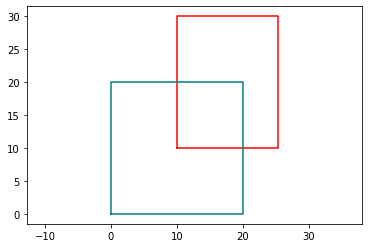

In [48]:
@dataclass
class Rectangle:
    origin: tuple[float, float] # x, y coordinate
    width: float
    height: float
    color: Optional[str] = None
    
    def x(self) -> list[float]:
        """Returns a list representing the x-ordinates of the rectangle"""
        x1 = self.origin[0]
        x2 = x1 + self.width
        return [x1, x2, x2, x1, x1]
    
    def y(self) -> list[float]:
        """Returns a list representing the y-ordinates of the rectangle"""
        y1 = self.origin[1]
        y2 = y1 + self.height
        return [y1, y1, y2, y2, y1]
    
    def show(self) -> None:
        """Plots the rectangle to the notebook"""
        pyplot.plot(self.x(), self.y(), color=self.color)
        pyplot.axis('equal')
        
    def show_two(self, other: Rectangle) -> None:
        """Plots self and 'other' in the same plot"""
        pyplot.plot(self.x(), self.y(), color = self.color)
        pyplot.plot(other.x(), other.y(), color = other.color)
        pyplot.axis('equal')
        
rect_1 = Rectangle((10, 10), 15.3, 20, "red")
rect_2 = Rectangle((0, 0), 20, 20, 'teal')

rect_1.show_two(rect_2)

### Reviewer Comments

# Task E

For your last task, design a standalone function called `check_overlap` that takes two `Rectangle` objects as parameters. 

Lets define "overlap" as being any time two rectangles are touching in any way, whether the two are touching at just one point, on an edge, or one is fully contained in the other.

The function should return `True` if the two rectangles overlap and `False` otherwise.

## Task E response

In [49]:
def check_overlap(a: Rectangle, b: Rectangle) -> bool:
    """Returns True if 'a' and 'b' rectangles overlap. False otherwise."""
    ax_min = min(a.x())
    ax_max = max(a.x())
    bx_min = min(b.x())
    bx_max = max(b.x())
    
    ay_min = min(a.y())
    ay_max = max(a.y())
    by_min = min(b.y())
    by_max = max(b.y())
    
    if not (
        (ax_min <= bx_min <= ax_max) 
        or (ax_min <= bx_max <= ax_max)
        or (bx_min <= ax_min <= bx_max)
        or (bx_min <= ax_max <= bx_max)
    ):
        return False
    elif not (
        (ay_min <= by_min <= ay_max) 
        or (ay_min <= by_max <= ay_max)
        or (by_min <= ay_min <= by_max)
        or (by_min <= ay_max <= by_max)
    ):
        return False
    else: 
        return True

## Task E tests

In [50]:
def test_check_overlap():
    # N touch
    rect_1 = Rectangle((0, 0), 15.3, 20, "red")
    rect_2 = Rectangle((0, 20), 20, 20, 'teal')
    assert check_overlap(rect_1, rect_2) == True
    
    # Disjoint
    rect_1 = Rectangle((200, 200), 14, 18, "red")
    rect_2 = Rectangle((-20, 0), 20, 20, 'teal')
    assert check_overlap(rect_1, rect_2) == False
    
    # SW touch
    rect_1 = Rectangle((0, 0), 15.3, 20, "red")
    rect_2 = Rectangle((-20, -20), 20, 20, 'teal')
    assert check_overlap(rect_1, rect_2) == True
    
    # Contains (1 in 2)
    rect_1 = Rectangle((-19, 1), 14, 18, "red")
    rect_2 = Rectangle((-20, 0), 20, 20, 'teal')
    assert check_overlap(rect_1, rect_2) == True
    
    # Contains (2 in 1)
    rect_1 = Rectangle((-19, 1), 14, 18, "red")
    rect_2 = Rectangle((-20, 0), 20, 20, 'teal')
    assert check_overlap(rect_2, rect_1) == True
        
    # Typical
    rect_1 = Rectangle((-10, -5), 14, 18, "red")
    rect_2 = Rectangle((-20, 0), 20, 20, 'teal')
    assert check_overlap(rect_1, rect_2) == True
    
ipytest.run()

....                                                                                         [100%]
4 passed in 0.03s


# Submit Workbook 06

In this workbook, you started by defining a `Rectangle` data type with only three attributes: `origin`, `width`, `height`. You only explicitly defined one coordinate.

1. By creating the _methods_ `x`, `y`, it became easy to design other methods (like `show` and `show_two`) without having to do very much work
2. By creating the method `show_two` it allowed us to more easily write the `check_overlap` function because you could _see_ if two shapes overlap and should return either `True` or `False`
3. You have gotten a taste of a different kind of approach to creating programs. In **Workbook 05** you created a series of functions that kind of worked like a pipeline to process data from a file into a desired output. In this workbook, you got a taste of "object oriented programming" where you:
    1. Created the `Rectangle` _class_ of objects and then used the class to create rectangles with different data in them.
    2. Designed a method called `show_two` which _composed_ objects together to create a useful output
    3. Designed a function that operates on your objects which was probably easier than writing a function that operated on lists of numbers that representing rectangles.

Next week, you are going to design an interactive web interface in Jupyter (complete with text entry boxes, sliders, dropdowns, etc.) which you can use to interact with either sympy `Beam` objects or your `Rectangles`.

For now, email your completed workbook to me at `cferster@rjc.ca` with the subject line `Workbook 06 Submission`


---

# Task F (Bonus - not required)

Design a function called `check_strict_overlap` that is similar to `check_overlap` except it returns `False` if the rectangles are touching at a single point, touching on an edge, or are completely disjoint. Returns `True` otherwise.

There are a lot of test cases to check with this one so, if you want to do the bonus, I have included a test suite you can run to check if your `check_strict_overlap` can pass all of the tests.

In [51]:
def check_strict_overlap(a: Rectangle, b: Rectangle) -> bool:
    """Returns True if 'a' and 'b' rectangles overlap. False otherwise."""
    ax_min = min(a.x())
    ax_max = max(a.x())
    bx_min = min(b.x())
    bx_max = max(b.x())
    
    ay_min = min(a.y())
    ay_max = max(a.y())
    by_min = min(b.y())
    by_max = max(b.y())
    
    x_conditions = [
        (ax_min < bx_min < ax_max),
        (ax_min < bx_max < ax_max),
        (bx_min < ax_min < bx_max),
        (bx_min < ax_max < bx_max),
        (ax_min == bx_min),
        (ax_max == bx_max),
    ]
    
    y_conditions = [
        (ay_min < by_min < ay_max),
        (ay_min < by_max < ay_max),
        (by_min < ay_min < by_max),
        (by_min < ay_max < by_max),
        (ay_min == by_min),
        (ay_max == by_max),
    ]
    
    x_conds_met = sum(x_conditions)
    y_conds_met = sum(y_conditions)
    print(f"{x_conds_met=}")
    print(f"{y_conds_met=}")
    
    if (x_conds_met >= 1) and (y_conds_met >= 1):
        return True
    return False

## Bonus test suite

In [52]:
def test_strict_overlap():
    # N touch
    rect_1 = Rectangle((0, 0), 15.3, 20, "red")
    rect_2 = Rectangle((0, 20), 20, 20, 'teal')
    assert check_strict_overlap(rect_1, rect_2) == False

    # NE corner touch
    rect_1 = Rectangle((0, 0), 15.3, 20, "red")
    rect_2 = Rectangle((15.3, 20), 20, 20, 'teal')
    assert check_strict_overlap(rect_1, rect_2) == False

    # E touch
    rect_1 = Rectangle((0, 0), 15.3, 20, "red")
    rect_2 = Rectangle((15.3, 0), 20, 20, 'teal')
    assert check_strict_overlap(rect_1, rect_2) == False

    # SE corner touch
    rect_1 = Rectangle((0, 0), 15.3, 20, "red")
    rect_2 = Rectangle((15.3, -20), 20, 20, 'teal')
    assert check_strict_overlap(rect_1, rect_2) == False

    # S touch
    rect_1 = Rectangle((0, 0), 15.3, 20, "red")
    rect_2 = Rectangle((0, -20), 20, 20, 'teal')
    assert check_strict_overlap(rect_1, rect_2) == False

    # SW touch
    rect_1 = Rectangle((0, 0), 15.3, 20, "red")
    rect_2 = Rectangle((-20, -20), 20, 20, 'teal')
    assert check_strict_overlap(rect_1, rect_2) == False

    # W touch
    rect_1 = Rectangle((0, 0), 15.3, 20, "red")
    rect_2 = Rectangle((-20, 0), 20, 20, 'teal')
    assert check_strict_overlap(rect_1, rect_2) == False

    # NW touch
    rect_1 = Rectangle((0, 0), 15.3, 20, "red")
    rect_2 = Rectangle((-20, 20), 20, 20, 'teal')
    assert check_strict_overlap(rect_1, rect_2) == False

    # 2 contains 1
    rect_1 = Rectangle((-19, 1), 14, 18, "red")
    rect_2 = Rectangle((-20, 0), 20, 20, 'teal')
    assert check_strict_overlap(rect_1, rect_2) == True
    
    # 1 contains 2
    rect_1 = Rectangle((-19, 1), 14, 18, "red")
    rect_2 = Rectangle((-20, 0), 20, 20, 'teal')
    assert check_strict_overlap(rect_1, rect_2) == True

    # Disjoint
    rect_1 = Rectangle((200, 200), 14, 18, "red")
    rect_2 = Rectangle((-20, 0), 20, 20, 'teal')
    assert check_strict_overlap(rect_1, rect_2) == False
    
    # Typical
    rect_1 = Rectangle((-10, -5), 14, 18, "red")
    rect_2 = Rectangle((-20, 0), 20, 20, 'teal')
    assert check_overlap(rect_1, rect_2) == True
    
#  ipytest.run() # Uncomment to run this test